 Initial Data Info 

 Initial Null Values 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

  Initial Data Head 
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       Fal

C:\Users\thous\AppData\Local\Temp\ipykernel_26180\3994213733.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\thous\AppData\Local\Temp\ipykernel_26180\3994213733.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

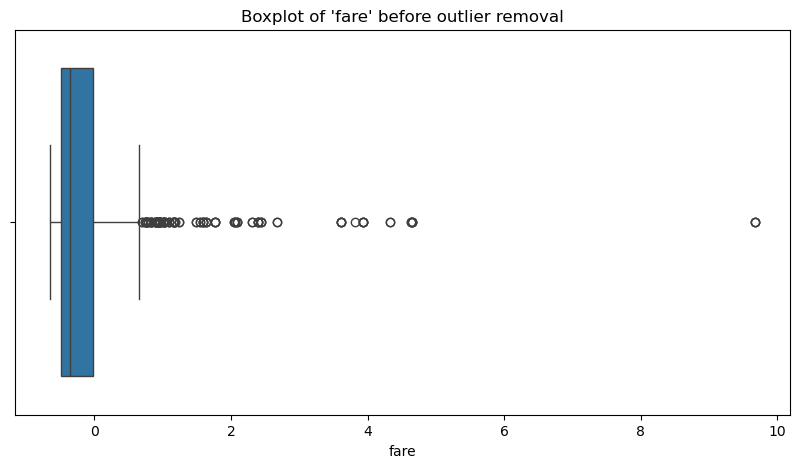


Original shape: (891, 13)
Shape after removing 'fare' outliers: (775, 13)

 Visualizing 'fare' Outliers After Removal 


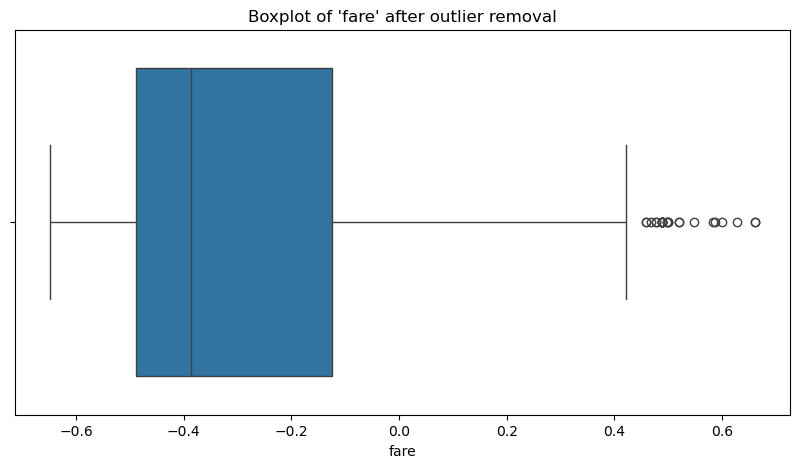


 Final Processed Data Head S
   survived  pclass       age  sibsp  parch      fare  sex_male  embarked_Q  \
0         0       3 -0.565736      1      0 -0.502445      True       False   
2         1       3 -0.258337      0      0 -0.488854     False       False   
3         1       1  0.433312      1      0  0.420730     False       False   
4         0       3  0.433312      0      0 -0.486337      True       False   
5         0       3 -0.104637      0      0 -0.478116      True        True   

   embarked_S  class_Second  class_Third  who_man  who_woman  
0        True         False         True     True      False  
2        True         False         True    False       True  
3        True         False        False    False       True  
4        True         False         True     True      False  
5       False         False         True     True      False  

Data cleaning and preprocessing complete.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset('titanic')
print(" Initial Data Info ")

print("\n Initial Null Values ")
print(df.isnull().sum())

print("\n  Initial Data Head ")
print(df.head())

df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop('deck', axis=1, inplace=True)

print("\n Data After Handling Missing Values")
print(df.isnull().sum())
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who'], drop_first=True)
df.drop(['alive', 'adult_male', 'embark_town', 'alone'], axis=1, inplace=True, errors='ignore')
print("\n Data After Encoding ")
print(df.head())
numerical_features = ['age', 'fare']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\n Data After Standardization")
print(df.head())
print("\n  Visualizing 'fare' Outliers Before Removal")
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fare'])
plt.title("Boxplot of 'fare' before outlier removal")
plt.show()

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing 'fare' outliers: {df_no_outliers.shape}")

print("\n Visualizing 'fare' Outliers After Removal ")
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_no_outliers['fare'])
plt.title("Boxplot of 'fare' after outlier removal")
plt.show()
print("\n Final Processed Data Head S")
print(df_no_outliers.head())
df_no_outliers.to_csv('titanic_cleaned.csv', index=False)
print("\nData cleaning and preprocessing complete.")